# Modeling Exercises
------

# Decision Tree Exercises

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import acquire
import prepare2


Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [5]:
df = acquire.get_titanic_data()

In [6]:
train, validate, test = prepare2.prep_titanic_data(df)

/Users/Heather/codeup-data-science/classification-exercises/prepare2.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['embark_town'] = imputer.transform(test[['embark_town']])


In [7]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [8]:
# most people died
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
# add baseline column and set all values to 0 (aka died), the most common value in survived
train['baseline'] = 0

In [10]:
# create classification report of baseline model
baseline_class_report = classification_report(train.survived, train.baseline, zero_division=True)
print(baseline_class_report)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       1.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.81      0.50      0.38       498
weighted avg       0.76      0.62      0.47       498



### *Accuracy for the baseline model (always predicting death) is 62%.* 

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [11]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
474,0,3,0,0,9.8375,1,0,0,1,0
370,1,1,1,0,55.4417,0,1,0,0,0
573,1,3,0,0,7.7500,1,0,1,0,0
110,0,1,0,0,52.0000,1,1,0,1,0
167,0,3,1,4,27.9000,0,0,0,1,0


In [7]:
# choose my features for the model
# pclass, sex (m or f), sibsp (family members, siblings and spouse)

X_cols = ['pclass', 'sex_male', 'sibsp']
y_col = 'survived'

# do the capital X lowercase y thing for train test and split
# X is the data frame of the features, y is a series of the target
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [135]:
# Create decision tree model
model1 = DecisionTreeClassifier()
# fit model to train data
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
# look at the model scores for training set and validate set
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 82.13%
validate score: 72.43%


[Text(421.19999999999993, 454.2942857142857, 'X[1] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(230.39999999999998, 384.40285714285716, 'X[0] <= 2.5\ngini = 0.372\nsamples = 174\nvalue = [43, 131]'),
 Text(115.19999999999999, 314.51142857142855, 'X[0] <= 1.5\ngini = 0.059\nsamples = 98\nvalue = [3, 95]'),
 Text(57.599999999999994, 244.62, 'X[2] <= 0.5\ngini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(28.799999999999997, 174.7285714285714, 'gini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(86.39999999999999, 174.7285714285714, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(172.79999999999998, 244.62, 'X[2] <= 1.5\ngini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(144.0, 174.7285714285714, 'X[2] <= 0.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(115.19999999999999, 104.83714285714285, 'gini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(172.79999999999998, 104.83714285714285, 'gini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(201.59999999999

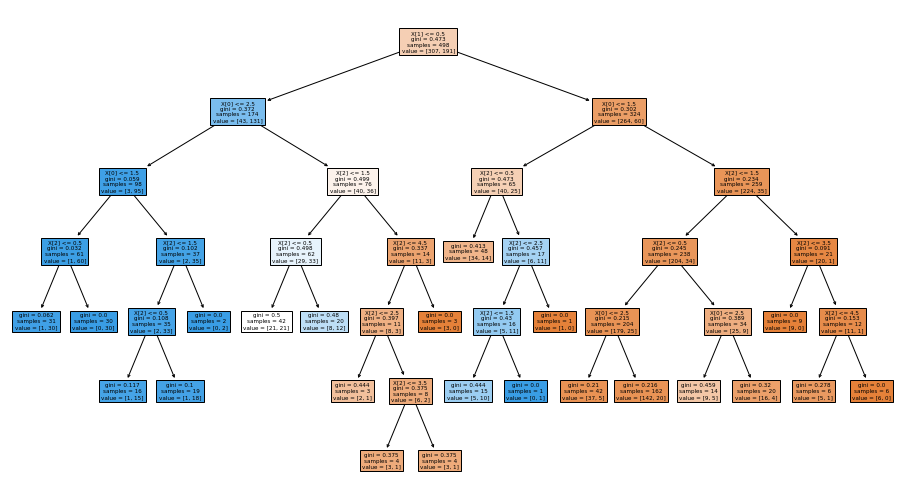

In [137]:
# plot the decision tree
plt.figure(figsize = (16,9))
plot_tree(model1, filled = True )

In [138]:
# woa that has so many nodes. 
# I will try again with same features, and give the decision tree a depth limit

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report. - compute metrics on the TRAIN set



In [139]:
# look at the model scores for training set and validate set
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 82.13%
validate score: 72.43%


In [140]:
# use model 1 to predict on the TRAIN set
# add a column for model1 predictions
train['model1_prediction'] = model1.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1_prediction,model2_predictions
474,0,3,0,0,9.8375,1,0,0,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0,0,1,1
573,1,3,0,0,7.7500,1,0,1,0,0,0,1
110,0,1,0,0,52.0000,1,1,0,1,0,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,1,0


In [141]:
# do classification report comparing actuals to model 1's predictions (for the TRAIN set)
model1_class_report = classification_report(train.survived, train.model1_prediction, zero_division=True)
print(model1_class_report)

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.73       191

    accuracy                           0.82       498
   macro avg       0.84      0.78      0.80       498
weighted avg       0.83      0.82      0.81       498



In [142]:
# print confusion matrix
confusion_matrix(train.survived, train.model1_prediction)

#TP: Died, predicted dead: 291
#FP: Alive, predicted dead: 16
#FN: Dead, predicted alive: 73
#TN: Alive, predicted alive: 118

array([[291,  16],
       [ 73, 118]])

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support. - compute metrics on the VALIDATE set

In [144]:
# print the model score on the validate set
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

validate score: 72.43%


In [145]:
# add model 1 prediction column to the validate df
validate['model1_prediction'] = model1.predict(X_validate)
validate.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_prediction
569,1,3,0,0,7.8542,1,1,0,1,0
532,0,3,1,1,7.2292,0,1,0,0,0
223,0,3,0,0,7.8958,1,1,0,1,0
35,0,1,1,0,52.0000,0,1,0,1,1
93,0,3,1,2,20.5750,0,1,0,1,0


In [146]:
# run classification report for model 1 on validate set
model1_class_report = classification_report(validate.survived, validate.model1_prediction, zero_division=True)
print(model1_class_report)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       132
           1       0.69      0.50      0.58        82

    accuracy                           0.72       214
   macro avg       0.72      0.68      0.69       214
weighted avg       0.72      0.72      0.71       214



In [147]:
confusion_matrix(validate.survived, validate.model1_prediction)

#TP: Died, predicted dead: 114
#FP: Alive, predicted dead: 18
#FN: Dead, predicted alive: 41
#TN: Alive, predicted alive: 41

array([[114,  18],
       [ 41,  41]])

#### 5. Run through steps 2-4 using a different max_depth value.



In [148]:
# create model 2
# change depth to 4
model2 = DecisionTreeClassifier(max_depth=4)

# fit to train dataset
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(454.3714285714285, 440.31600000000003, 'X[1] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(255.08571428571426, 342.468, 'X[0] <= 2.5\ngini = 0.372\nsamples = 174\nvalue = [43, 131]'),
 Text(127.54285714285713, 244.62, 'X[0] <= 1.5\ngini = 0.059\nsamples = 98\nvalue = [3, 95]'),
 Text(63.771428571428565, 146.772, 'X[2] <= 0.5\ngini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(31.885714285714283, 48.924000000000035, 'gini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(95.65714285714284, 48.924000000000035, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(191.3142857142857, 146.772, 'X[2] <= 1.5\ngini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(159.42857142857142, 48.924000000000035, 'gini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(223.2, 48.924000000000035, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(382.6285714285714, 244.62, 'X[2] <= 1.5\ngini = 0.499\nsamples = 76\nvalue = [40, 36]'),
 Text(318.85714285714283, 146.772, 'X[2] <= 0.5\ngini 

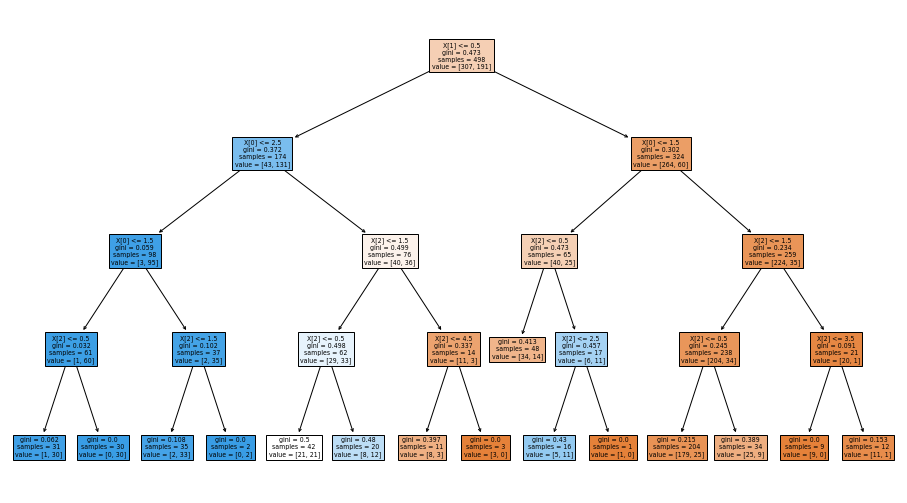

In [149]:
# visualize model2
plt.figure(figsize = (16,9))
plot_tree(model2, filled = True )

In [150]:
# run metrics on train set
# training score
print(f'Training Set Precision Score: {model2.score(X_train, y_train):.2%}')
# column of predictions to dataframe
train['model2_predictions'] = model2.predict(X_train)

Training Set Precision Score: 82.13%


In [151]:
# classification report
# this is just a different way to input these numbers. same as calling the data frame columns above
model2_class_report = classification_report(y_train, model2.predict(X_train), zero_division=True)
print(model2_class_report)
# confusion matrix
print('Confusion Matrix for model 2 on Train Set')
print(confusion_matrix(train.survived, train.model2_predictions))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.73       191

    accuracy                           0.82       498
   macro avg       0.84      0.78      0.80       498
weighted avg       0.83      0.82      0.81       498

Confusion Matrix for model 2 on Train Set
[[291  16]
 [ 73 118]]


In [152]:
# create function to print out metrics in one go
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        score = model.score(X_train, y_train)
        X = X_train
        y = y_train
        df = train
        
    if data_set == 'validate':
        score = model.score(X_validate, y_validate)
        X = X_validate
        y = y_validate
        df = validate
        
    if data_set == 'test':
        score = model.score(X_test, y_test)
        X = X_test
        y = y_test
        df = test
        
    print(f'{data_set} Set Precision Score: {score:.2%}')
    class_report = classification_report(df.survived, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'Classification report')
    print(class_report)
    print ('-------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(df.survived, model.predict(X)))


In [153]:
print('Metrics for Model 2 on Train data\n')
run_metrics(model2, 'train')

Metrics for Model 2 on Train data

train Set Precision Score: 82.13%
-------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.62      0.73       191

    accuracy                           0.82       498
   macro avg       0.84      0.78      0.80       498
weighted avg       0.83      0.82      0.81       498

-------------------------------
Confusion Matrix
[[291  16]
 [ 73 118]]


In [154]:
# run metrics on validate set
print('Metrics for Model 2 on Validate Data\n')
run_metrics(model2, 'validate')

Metrics for Model 2 on Validate Data

validate Set Precision Score: 72.43%
-------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       132
           1       0.69      0.50      0.58        82

    accuracy                           0.72       214
   macro avg       0.72      0.68      0.69       214
weighted avg       0.72      0.72      0.71       214

-------------------------------
Confusion Matrix
[[114  18]
 [ 41  41]]


In [155]:
print('Metrics for Model 1 on Validate Data\n')
run_metrics(model1, 'validate')

Metrics for Model 1 on Validate Data

validate Set Precision Score: 72.43%
-------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       132
           1       0.69      0.50      0.58        82

    accuracy                           0.72       214
   macro avg       0.72      0.68      0.69       214
weighted avg       0.72      0.72      0.71       214

-------------------------------
Confusion Matrix
[[114  18]
 [ 41  41]]


*Model 1 and model 2 perform the same!! Uh oh back to make a model 3*

In [156]:
# create model 3
# change max depth to 3
model3 = DecisionTreeClassifier(max_depth = 3)

# fit to train dataset
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(446.4, 428.08500000000004, 'X[1] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(223.2, 305.775, 'X[0] <= 2.5\ngini = 0.372\nsamples = 174\nvalue = [43, 131]'),
 Text(111.6, 183.46500000000003, 'X[0] <= 1.5\ngini = 0.059\nsamples = 98\nvalue = [3, 95]'),
 Text(55.8, 61.15499999999997, 'gini = 0.032\nsamples = 61\nvalue = [1, 60]'),
 Text(167.39999999999998, 61.15499999999997, 'gini = 0.102\nsamples = 37\nvalue = [2, 35]'),
 Text(334.79999999999995, 183.46500000000003, 'X[2] <= 1.5\ngini = 0.499\nsamples = 76\nvalue = [40, 36]'),
 Text(279.0, 61.15499999999997, 'gini = 0.498\nsamples = 62\nvalue = [29, 33]'),
 Text(390.59999999999997, 61.15499999999997, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(669.5999999999999, 305.775, 'X[0] <= 1.5\ngini = 0.302\nsamples = 324\nvalue = [264, 60]'),
 Text(558.0, 183.46500000000003, 'X[2] <= 0.5\ngini = 0.473\nsamples = 65\nvalue = [40, 25]'),
 Text(502.2, 61.15499999999997, 'gini = 0.413\nsamples = 48\nvalue = [34, 1

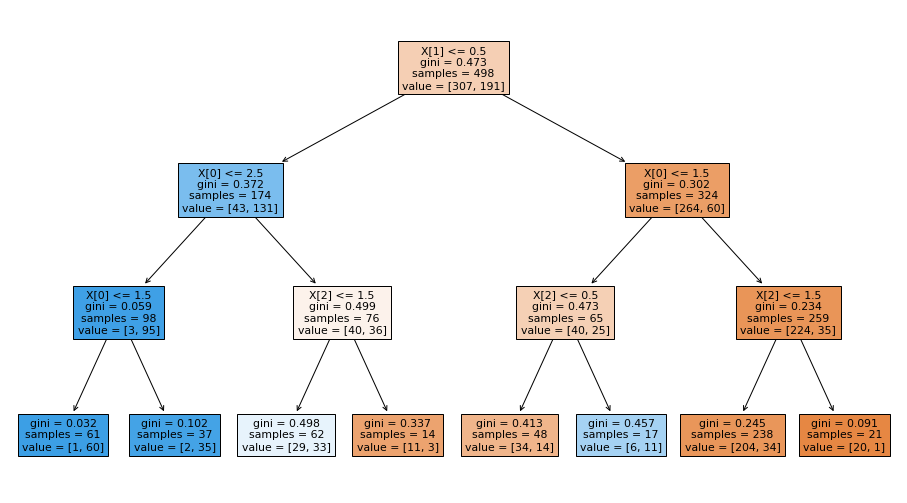

In [157]:
# visualize model3
plt.figure(figsize = (16,9))
plot_tree(model3, filled = True )

In [158]:
print('Metrics for Model 3 on Train Data\n')
run_metrics(model3, 'train')

print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

print('Metrics for Model 3 on Validate Data\n')
run_metrics(model3, 'validate')

Metrics for Model 3 on Train Data

train Set Precision Score: 81.93%
-------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------
Confusion Matrix
[[269  38]
 [ 52 139]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Metrics for Model 3 on Validate Data

validate Set Precision Score: 73.83%
-------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.66      0.65      0.65        82

    accuracy                           0.74       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.74      0.74  

#### 6. Which model performs better on your in-sample data (aka TRAIN set)?
- They all performed the same .82

#### 7. Which model performs best on your out-of-sample data, (aka the VALIDATE set)?
- Model 3 performed the best. .74 compared to .72

In [2]:
# revamped metrics function with some more printing in it. Help by Parker
def run_metrics2(model, data_set):
    """
    This function takes in a sklearn model and a data set name and prints out metrics for that model. 
    model = name of model 
    data_set = 'train', 'validate', or 'test' (AS A STRING)
    Can only be used after data is split, and X_ and y_ variables have been set, and after the sklearn model has been created
    Will output the Precision Score, the classification report, the confusion matrix, True Positive, False Positive, True Negative, and False Negative rates
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    print(f'{data_set} data set accuracy score: {score:.2%}')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')
    prc = matrix[1,1] / (matrix[1,1] + matrix[0,1])
    print('---------------------------------')
    print(f'{data_set} data set accuracy score: {score:.2%}')
    print(f'{data_set} data set precision score {prc:.2%}')
    print(f'{data_set} data set recall score: {tpr:.2%}')


<hr style="border-top: 10px groove lime; margin-top: 1px; margin-bottom: 1px"></hr>

# Random Forest

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [198]:
# create random forest model (named model 4)
model4 = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state=713)

# fit to train dataset
model4.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=713)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [223]:
print('Metrics for Model 4 (random forest) on the Train data \n')
run_metrics2(model4, 'train')

Metrics for Model 4 (random forest) on the Train data 

train data set accuracy score: 82.13%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[270  37]
 [ 52 139]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.77%
False positive rate for the model is  12.05%
True negative rate for the model is 87.95%
False negative rate for the model is 27.23%
---------------------------------
train data set accuracy score: 82.13%
train data set precision score 78.98%
train data set recall score: 72.77%


In [224]:
print('Metrics for Model 4 (random forest) on the Validate data \n')
run_metrics2(model4, 'validate')

Metrics for Model 4 (random forest) on the Validate data 

validate data set accuracy score: 73.83%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.66      0.65      0.65        82

    accuracy                           0.74       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[105  27]
 [ 29  53]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 64.63%
False positive rate for the model is  20.45%
True negative rate for the model is 79.55%
False negative rate for the model is 35.37%
---------------------------------
validate data set accuracy score: 73.83%
validate data set precision score 66.25%
validate data set recall score: 64.63%


#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [201]:
# create random forest model (named model 5)
model5 = RandomForestClassifier(min_samples_leaf = 2, max_depth = 6, random_state=713)

# fit to train dataset
model5.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, random_state=713)

In [202]:
print('Metrics for Model 5 (random forest) on the Train data \n')
run_metrics2(model5, 'train')

Metrics for Model 5 (random forest) on the Train data 

train data set accuracy score: 82.13%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[270  37]
 [ 52 139]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.77%
False positive rate for the model is  12.05%
True negative rate for the model is 87.95%
False negative rate for the model is 27.23%


In [203]:
print('Metrics for Model 5 (random forest) on the Validate data \n')
run_metrics2(model5, 'validate')

Metrics for Model 5 (random forest) on the Validate data 

validate data set accuracy score: 73.83%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.66      0.65      0.65        82

    accuracy                           0.74       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[105  27]
 [ 29  53]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 64.63%
False positive rate for the model is  20.45%
True negative rate for the model is 79.55%
False negative rate for the model is 35.37%


In [204]:
# create random forest model (named model 6)
model6 = RandomForestClassifier(min_samples_leaf = 1, max_depth = 2, random_state=713)

# fit to train dataset
model6.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=713)

In [205]:
print('Metrics for Model 6 (random forest) on the Train data \n')
run_metrics2(model6, 'train')

Metrics for Model 6 (random forest) on the Train data 

train data set accuracy score: 81.93%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.72      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[270  37]
 [ 53 138]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.25%
False positive rate for the model is  12.05%
True negative rate for the model is 87.95%
False negative rate for the model is 27.75%


In [206]:
print('Metrics for Model 6 (random forest) on the Validate data \n')
run_metrics2(model6, 'validate')

Metrics for Model 6 (random forest) on the Validate data 

validate data set accuracy score: 74.30%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       132
           1       0.67      0.65      0.66        82

    accuracy                           0.74       214
   macro avg       0.73      0.72      0.73       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[106  26]
 [ 29  53]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 64.63%
False positive rate for the model is  19.70%
True negative rate for the model is 80.30%
False negative rate for the model is 35.37%


In [207]:
# create random forest model (named model 7)
model7 = RandomForestClassifier(min_samples_leaf = 25, max_depth = 4, random_state=713)

# fit to train dataset
model7.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=25, random_state=713)

In [225]:
print('Metrics for Model 7 (random forest) on the train data \n')
run_metrics2(model7, 'train')

Metrics for Model 7 (random forest) on the train data 

train data set accuracy score: 80.92%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       307
           1       0.80      0.67      0.73       191

    accuracy                           0.81       498
   macro avg       0.81      0.78      0.79       498
weighted avg       0.81      0.81      0.81       498

-------------------------------

confusion matrix
[[275  32]
 [ 63 128]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 67.02%
False positive rate for the model is  10.42%
True negative rate for the model is 89.58%
False negative rate for the model is 32.98%
---------------------------------
train data set accuracy score: 80.92%
train data set precision score 80.00%
train data set recall score: 67.02%


In [226]:
###### This is the best one so far
print('Metrics for Model 7 (random forest) on the Validate data \n')
run_metrics2(model7, 'validate')

Metrics for Model 7 (random forest) on the Validate data 

validate data set accuracy score: 75.70%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       132
           1       0.71      0.62      0.66        82

    accuracy                           0.76       214
   macro avg       0.75      0.73      0.74       214
weighted avg       0.75      0.76      0.75       214

-------------------------------

confusion matrix
[[111  21]
 [ 31  51]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 62.20%
False positive rate for the model is  15.91%
True negative rate for the model is 84.09%
False negative rate for the model is 37.80%
---------------------------------
validate data set accuracy score: 75.70%
validate data set precision score 70.83%
validate data set recall score: 62.20%


In [213]:
# create random forest model (named model 8)
model8 = RandomForestClassifier(min_samples_leaf = 25, max_depth = 3, random_state=713)

# fit to train dataset
model8.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=25, random_state=713)

In [214]:
print('Metrics for Model 8 with the Train Data')
run_metrics2(model8, 'train')

Metrics for Model 8 with the Train Data
train data set accuracy score: 80.92%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       307
           1       0.91      0.56      0.69       191

    accuracy                           0.81       498
   macro avg       0.84      0.76      0.78       498
weighted avg       0.83      0.81      0.80       498

-------------------------------

confusion matrix
[[296  11]
 [ 84 107]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 56.02%
False positive rate for the model is  3.58%
True negative rate for the model is 96.42%
False negative rate for the model is 43.98%


In [215]:
print('Metrics for Model 8 with the Validate Data')
run_metrics2(model8, 'validate')

Metrics for Model 8 with the Validate Data
validate data set accuracy score: 74.30%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       132
           1       0.76      0.48      0.59        82

    accuracy                           0.74       214
   macro avg       0.75      0.69      0.70       214
weighted avg       0.75      0.74      0.73       214

-------------------------------

confusion matrix
[[120  12]
 [ 43  39]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 47.56%
False positive rate for the model is  9.09%
True negative rate for the model is 90.91%
False negative rate for the model is 52.44%


#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

<hr style="border-top: 10px groove lime; margin-top: 1px; margin-bottom: 1px"></hr>

# K Nearest Neighbors Exercises

#### 1. Continue working in your model file with the titanic dataset. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# create model named knn1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
knn1.score(X_train, y_train), knn1.score(X_validate, y_validate)

(0.821285140562249, 0.7336448598130841)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [11]:
run_metrics2(knn1, 'train')

train data set accuracy score: 82.13%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[270  37]
 [ 52 139]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.77%
False positive rate for the model is  12.05%
True negative rate for the model is 87.95%
False negative rate for the model is 27.23%
---------------------------------
train data set accuracy score: 82.13%
train data set precision score 78.98%
train data set recall score: 72.77%


In [12]:
run_metrics2(knn1, 'validate')

validate data set accuracy score: 73.36%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.66      0.63      0.65        82

    accuracy                           0.73       214
   macro avg       0.72      0.71      0.72       214
weighted avg       0.73      0.73      0.73       214

-------------------------------

confusion matrix
[[105  27]
 [ 30  52]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 63.41%
False positive rate for the model is  20.45%
True negative rate for the model is 79.55%
False negative rate for the model is 36.59%
---------------------------------
validate data set accuracy score: 73.36%
validate data set precision score 65.82%
validate data set recall score: 63.41%


#### 4. Run through steps 2-4 setting k to 10

In [17]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)
knn2.score(X_train, y_train), knn2.score(X_validate, y_validate)

(0.8172690763052208, 0.7383177570093458)

In [18]:
run_metrics2(knn2, 'train')

train data set accuracy score: 81.73%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.78      0.72      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[269  38]
 [ 53 138]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.25%
False positive rate for the model is  12.38%
True negative rate for the model is 87.62%
False negative rate for the model is 27.75%
---------------------------------
train data set accuracy score: 81.73%
train data set precision score 78.41%
train data set recall score: 72.25%


In [19]:
run_metrics2(knn2, 'validate')

validate data set accuracy score: 73.83%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.67      0.63      0.65        82

    accuracy                           0.74       214
   macro avg       0.72      0.72      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[106  26]
 [ 30  52]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 63.41%
False positive rate for the model is  19.70%
True negative rate for the model is 80.30%
False negative rate for the model is 36.59%
---------------------------------
validate data set accuracy score: 73.83%
validate data set precision score 66.67%
validate data set recall score: 63.41%


In [ ]:
# for both n_neighbors = 1 and n_neighbors = 10 not really any significant changes in the performance

#### 5. Run through setps 2-4 setting k to 20

In [20]:
knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(X_train, y_train)
knn3.score(X_train, y_train), knn3.score(X_validate, y_validate)

(0.821285140562249, 0.7336448598130841)

In [21]:
run_metrics2(knn3, 'train')

train data set accuracy score: 82.13%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       307
           1       0.79      0.73      0.76       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498

-------------------------------

confusion matrix
[[270  37]
 [ 52 139]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 72.77%
False positive rate for the model is  12.05%
True negative rate for the model is 87.95%
False negative rate for the model is 27.23%
---------------------------------
train data set accuracy score: 82.13%
train data set precision score 78.98%
train data set recall score: 72.77%


In [22]:
run_metrics2(knn3, 'validate')

validate data set accuracy score: 73.36%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       132
           1       0.66      0.63      0.65        82

    accuracy                           0.73       214
   macro avg       0.72      0.71      0.72       214
weighted avg       0.73      0.73      0.73       214

-------------------------------

confusion matrix
[[105  27]
 [ 30  52]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 63.41%
False positive rate for the model is  20.45%
True negative rate for the model is 79.55%
False negative rate for the model is 36.59%
---------------------------------
validate data set accuracy score: 73.36%
validate data set precision score 65.82%
validate data set recall score: 63.41%


#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- for my training data set performance is similar accross all three models. I used only the variables, pclass, sibsp (sibling, spouse), and is_male. 
- However, the n_neighbors = 1 accuracy was 82, then it seemed to go down a bit to 81 with n_neigbors = 10, and then going back up to 82 with n_neighbors = 20. The higher percentage with the neighbor count suggests overfitting.  
- I'm going to try n_neighbor = 4 and see where that gets me
- if you look below there's a loop checking the accuracy percentages for neighbors 1 - 20. 
- Seems as if 2 works the best for the variables I'm using

#### 7. Which model performs best on our out-of-sample data from validate?
- the model with n_neighbors = 10 (knn2), however it only performs better by like half a percent
- Not sure if my variables have anything to do with it. 


In [39]:
# create knn4 which is n_neighbors = 2
knn4 = KNeighborsClassifier(n_neighbors=2)
knn4.fit(X_train, y_train)
knn4.score(X_train, y_train), knn4.score(X_validate, y_validate)

(0.8012048192771084, 0.7570093457943925)

In [37]:
# use loop from lesson demo (with some tweaks) to see neighbor results for 1 - 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_train, y_train)
    accuracyv = knn.score(X_validate, y_validate)
    print(f'{k:2d}: Train: {accuracy:4.2%} Validate: {accuracyv:4.2%}')

 1: Train: 82.13% Validate: 73.36%
 2: Train: 80.12% Validate: 75.70%
 3: Train: 74.50% Validate: 64.49%
 4: Train: 81.73% Validate: 73.83%
 5: Train: 76.91% Validate: 68.69%
 6: Train: 81.12% Validate: 70.56%
 7: Train: 80.92% Validate: 71.03%
 8: Train: 81.73% Validate: 74.30%
 9: Train: 80.72% Validate: 71.50%
10: Train: 81.73% Validate: 73.83%
11: Train: 81.73% Validate: 73.83%
12: Train: 81.93% Validate: 73.83%
13: Train: 82.13% Validate: 73.36%
14: Train: 81.93% Validate: 73.83%
15: Train: 82.13% Validate: 73.36%
16: Train: 81.93% Validate: 73.83%
17: Train: 82.13% Validate: 73.36%
18: Train: 82.13% Validate: 73.36%
19: Train: 82.13% Validate: 73.36%
20: Train: 82.13% Validate: 73.36%


#### Using 2 n_neighbors performs the best here. It has a validate accuracy score of almost 76%. Also doesn't appear to be overfit to the training set

In [40]:
# run the 2n_neighbors on the test set (knn4)

run_metrics2(knn4, 'test') 

test data set accuracy score: 77.65%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       110
           1       0.94      0.45      0.61        69

    accuracy                           0.78       179
   macro avg       0.84      0.72      0.73       179
weighted avg       0.82      0.78      0.75       179

-------------------------------

confusion matrix
[[108   2]
 [ 38  31]]
 
test data set model metrics
---------------------------------
True positive rate for the model is 44.93%
False positive rate for the model is  1.82%
True negative rate for the model is 98.18%
False negative rate for the model is 55.07%
---------------------------------
test data set accuracy score: 77.65%
test data set precision score 93.94%
test data set recall score: 44.93%
